# Tarea 3

## Ejercicio 1

(a) Consideren el mapeo $F(x) = x^2-2$ definido en $-2 \leq x \leq 2$.
* A partir de una condición inicial tomada al azar, construyan una órbita
muy larga, por ejemplo, de $20,000$ iterados, o más.
* Obtengan el histograma de frecuencias (normalizado) de los puntos que la órbita visita.

In [7]:
F(x) = x^2 - 2

xs = zeros(20_000)
xs[1] = F(rand()*2-1)
for i in 2:20_000
    xs[i] = F(xs[i-1])
end

xs[end-5:end]

6-element Vector{Float64}:
  1.902190375465516
  1.618328224513641
  0.6189862422574737
 -1.6168560318959722
  0.6142234278783891
 -1.6227295806453212

In [8]:
using Plots

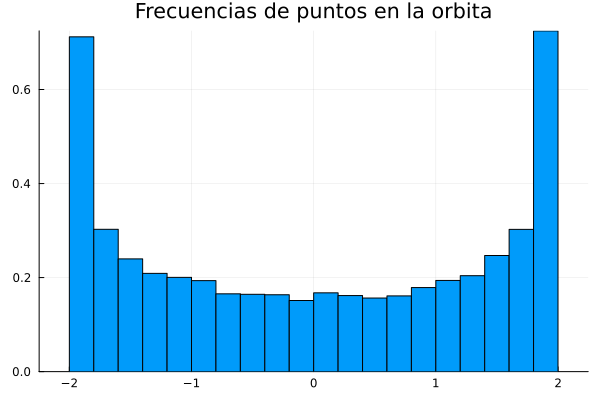

In [12]:
histogram(xs, normalize = true, title = "Frecuencias de puntos en la orbita", label = "")

(b) Repitan el ejercicio anterior considerando muchas condiciones
iniciales y pocos iterados, por ejemplo, $50$.

In [15]:
N = 20_000
ys = [2rand()-1 for i in 1:N]
for i in 1:N
    for _ in 1:50
        ys[i] = F(ys[i])
    end
end

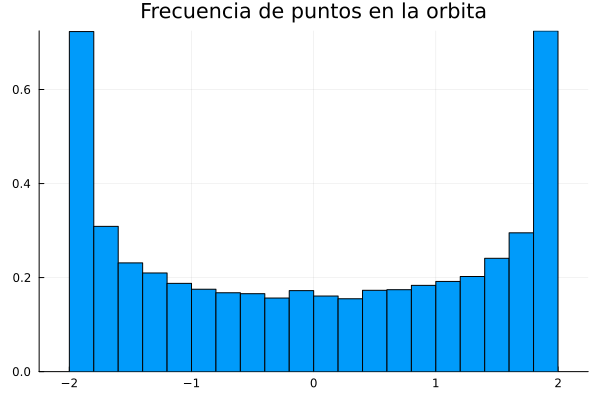

In [16]:
histogram(ys, normalize = true, label = "", title = "Frecuencia de puntos en la orbita")

(c) ¿Qué conclusión podemos sacar de los histogramas en ambos casos?

Raz: Que más bien podemos tomar muchos distintos puntos aleatorios e iterarlos pocas veces para que "caigan" en sus órbitas respectivas.

## Ejercicio 2

(a) Usando lo que desarrollaron para los números `Dual`es, creen un
un módulo que llamaremos `NumDual`.

* El módulo debe exportar el tipo `Dual`, y la función
`dual(x)` que crea al `Dual(x, 1.0)` que corresponde a la variable independiente.
* El archivo con el módulo lo deben incluir en un archivo ".jl" en su
propio directorio de tareas. El módulo deberá ser cargado usando

```julia
include("nombre_archivo.jl")
using .NumDual
```


In [17]:
include("duales-raz.jl")
using .NumDual

(b) Escriban una función que implemente el método de Newton para funciones
en una dimensión. 
* La derivada que se requiere debe ser calculada a través
de los números duales. 
* Obtengan usando esta implementación un cero de
$f(x) = x^3 - 15.625$, para verificar que su implementación funciona.

In [28]:
import .NumDual: fun, der

function newton(f, x0, N)
    x_n = dual(x0)
    for i in 1:N
        x_n -= fun(f(x_n))/der(f(x_n))
    end
    x_n
end

f_1(x) = x^3 - 15.625
root = newton(f_1, 2, 100) 
@assert fun(f_1(root)) == 0 "Newton works!"


(c) Encuentren *todos* los puntos fijos del mapeo $ F(x) = x^2 - 1.1 $ usando la función que implementaron para el método de Newton.


In [57]:
zs = collect(-2:1/128:2)

f_2(x) = x^2 - 1.1

for i in 1:length(zs)
    for _ in 1:50
        zs[i] = f_2(zs[i])
    end
end



(d) Encuentren los puntos *de periodo 2* para el mapeo $F(x) = x^2 - 1.1$ usando la función que implementaron para el método de Newton.


In [69]:
puntos_fijos = zs[zs .== f_2.(f_2.(zs))]

1-element Vector{Float64}:
 Inf


(e) Usen los números duales para mostrar que los puntos de periodo 2
para el mapeo $F(x) = x^2 -1$ son linealmente estables (atractivos).

In [70]:
# Obtener puntos fijos de periodo 2
rs = collect(-2:1/128:2)

f_3(x) = x^2 - 1

for i in 1:length(rs)
    for _ in 1:50
        rs[i] = f_2(rs[i])
    end
end

puntos_fijos_periodo_2 = rs[rs .== f_3.(f_3.(rs))]

88-element Vector{Float64}:
 Inf
 Inf
 Inf
 Inf
 Inf
 Inf
 Inf
 Inf
 Inf
 Inf
  ⋮
 Inf
 Inf
 Inf
 Inf
 Inf
 Inf
 Inf
 Inf
 Inf

## Ejercicio 3:

(a) Llamaremos $c_n$ al valor del parámetro $c$ para el mapeo cuadrático
$Q_c(x) = x^2-c$, donde ocurre el ciclo superestable de periodo $2^n$,
esto es, el valor de $c$ tal que $x_0=0$ pertenece a la órbita
periódica de periodo $2^n$.

- Calculen los valores de $c_r$, al menos hasta $c_7$. Con estos
valores, definimos la secuencia $\{f_0, f_1, f_2, \dots\}$, donde

$$
\begin{equation*}
f_n = \frac{c_n-c_{n+1}}{c_{n+1}-c_{n+2}} .
\end{equation*}
$$



(b) Aproximen el valor al que converge esta secuencia,
es decir, den una estimación de $\delta = f_\infty$.

- De los $2^p$ puntos del ciclo de periodo $2^p$ superestable, es decir,
$\{0, p_1, \dots p_{2^{n-1}}\,\}$ hay uno (*distinto del 0*) cuya distancia
a 0 es la menor; a esa distancia la identificaremos como $d_n$.
Estimen numéricamente a qué converge la secuencia

$$
\begin{equation*}
\alpha = - d_n/d_{n+1},
\end{equation*}
$$

en el límite de $n$ muy grande.